In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
import os
import zipfile

In [59]:
# Определите текущую директорию скрипта
script_directory = os.path.dirname(os.path.abspath('SQLAlchemy.ipynb'))

# Путь к zip-архиву
zip_file_path = os.path.join(script_directory, '..', 'dataset4.zip')

# Распаковать zip-архив во временную папку
temp_folder = os.path.join(script_directory, '..', 'temp_folder')
os.makedirs(temp_folder, exist_ok=True)
zip_ref = zipfile.ZipFile(zip_file_path, 'r')
zip_ref.extractall(temp_folder)
zip_ref.close()

# Загрузить CSV-файл из временной папки
csv_file_path = os.path.join(temp_folder, 'NHANES_age_prediction.csv')

In [12]:
data = pd.read_csv('NHANES_age_prediction.csv')

In [13]:
print(data.head())

   age_group  RIDAGEYR  RIAGENDR  PAQ605   BMXBMI  LBXGLU  DIQ010  LBXGLT  \
0          1      61.0       2.0     2.0     35.7   110.0     2.0   150.0   
1          1      26.0       2.0     2.0  45371.0    89.0     2.0    80.0   
2          1      16.0       1.0     2.0  45345.0    89.0     2.0    68.0   
3          1      32.0       1.0     2.0  45563.0   104.0     2.0    84.0   
4          1      38.0       2.0     1.0     35.9   103.0     2.0    81.0   

      LBXIN  
0     14.91  
1  31107.00  
2  41791.00  
3     16.15  
4  33878.00  


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age_group  2278 non-null   int64  
 1   RIDAGEYR   2278 non-null   float64
 2   RIAGENDR   2278 non-null   float64
 3   PAQ605     2278 non-null   float64
 4   BMXBMI     2278 non-null   float64
 5   LBXGLU     2278 non-null   float64
 6   DIQ010     2278 non-null   float64
 7   LBXGLT     2278 non-null   float64
 8   LBXIN      2278 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 160.3 KB
None


In [63]:
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   int64  
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 178.1 KB
None


In [64]:
print(data.isnull().sum())

               SEQN    age_group     RIDAGEYR     RIAGENDR       PAQ605  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819     1.159789    41.795874     1.511414     1.822651   
std     2921.365151     0.366491    20.156111     0.499979     0.398918   
min    73564.000000     1.000000    12.000000     1.000000     1.000000   
25%    76171.750000     1.000000    24.000000     1.000000     2.000000   
50%    78749.000000     1.000000    41.000000     2.000000     2.000000   
75%    81213.500000     1.000000    58.000000     2.000000     2.000000   
max    83727.000000     2.000000    80.000000     2.000000     7.000000   

            BMXBMI       LBXGLU       DIQ010       LBXGLT        LBXIN  
count  2278.000000  2278.000000  2278.000000  2278.000000  2278.000000  
mean     27.955180    99.553117     2.016242   114.978929    11.834794  
std       7.248962    17.889834     0.185556    47.061239     9.718812  
min      14.500000    63.000000 

In [65]:
# Установка стиля Seaborn для графиков
sns.set_theme(style="whitegrid")

# Построение гистограмм для всех числовых признаков
num_features = ['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']
plt.figure(figsize=(15, 10))  # Установка размера общего поля для графиков
for i, col in enumerate(num_features):
    plt.subplot(3, 3, i+1)  # Создание подграфика для каждого признака
    sns.histplot(data[col], kde=True)
    plt.title(f'Гистограмма для {col}')  # Установка заголовка для каждой гистограммы

plt.suptitle('Распределение признаков', size=16, y=1.02)  # Установка общего заголовка для всех гистограмм
plt.tight_layout()  # Автоматическое устранение перекрытий между графиками
plt.show()  # Отображение графиков

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


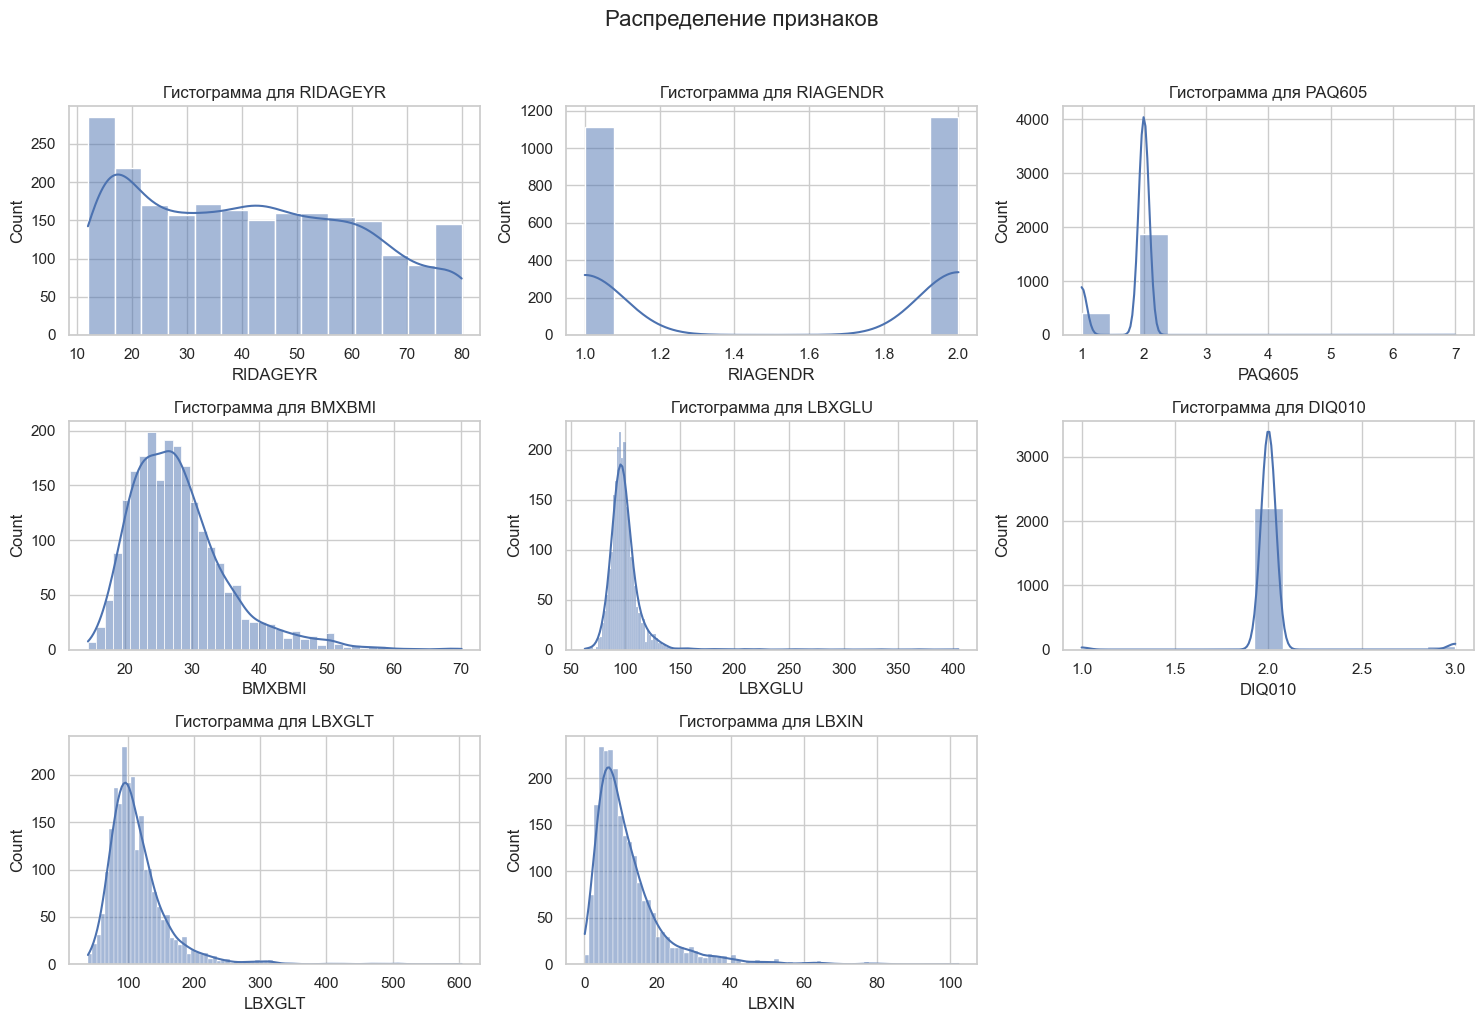

In [66]:
data.dropna(inplace=True)

In [67]:
for column in data.columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.savefig(f'{column}_histogram.png', bbox_inches='tight') 

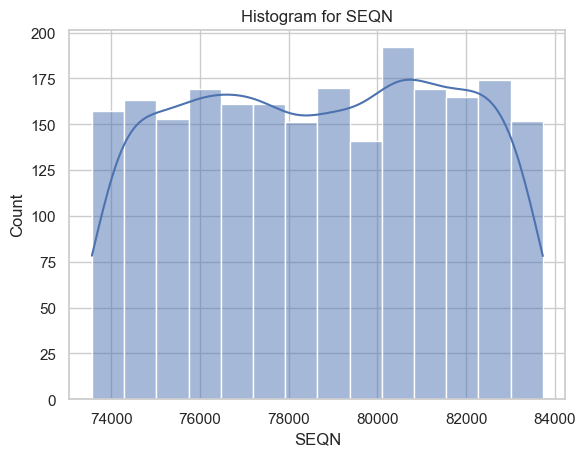

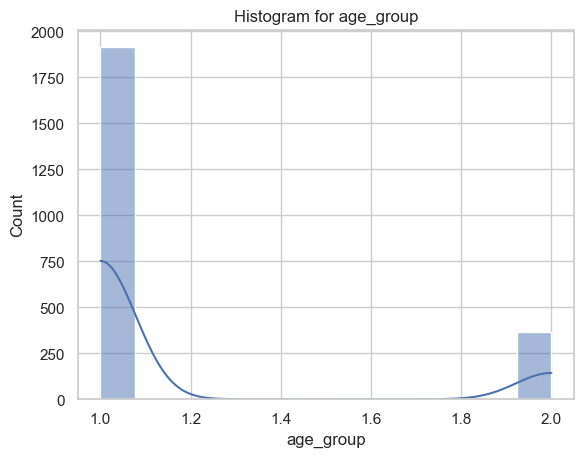

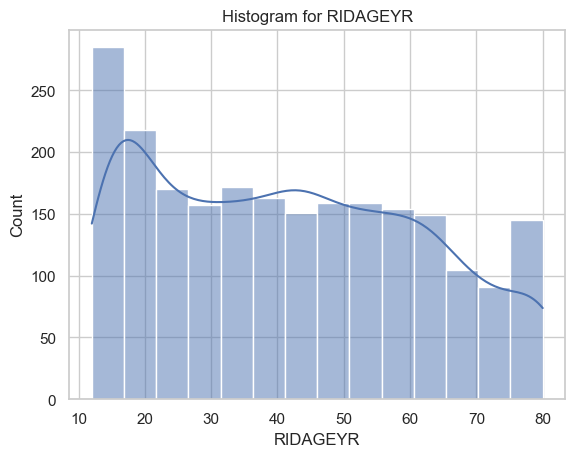

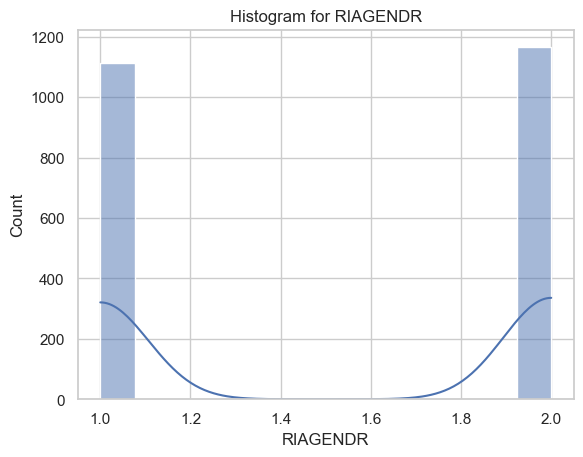

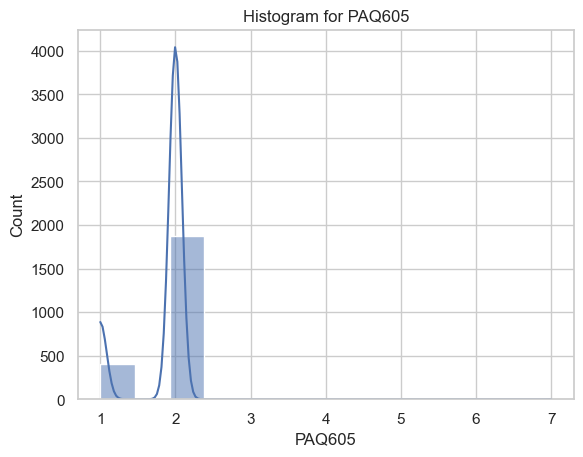

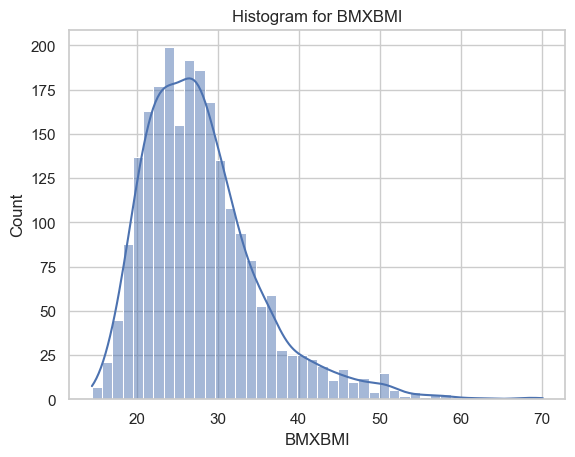

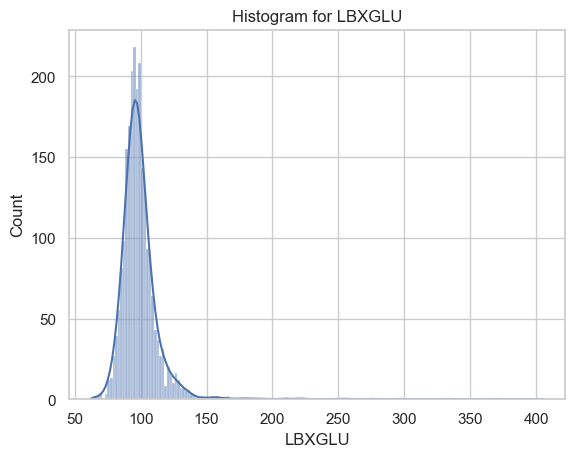

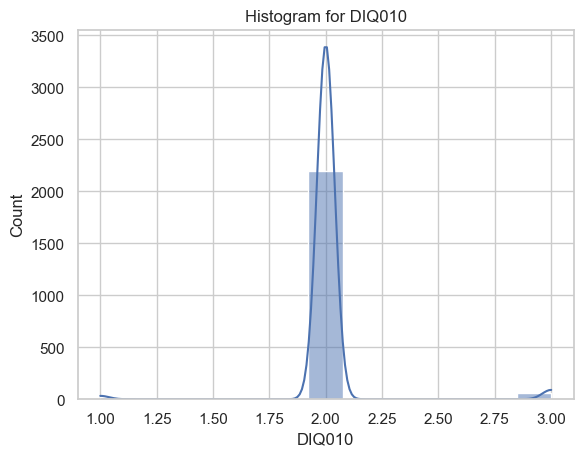

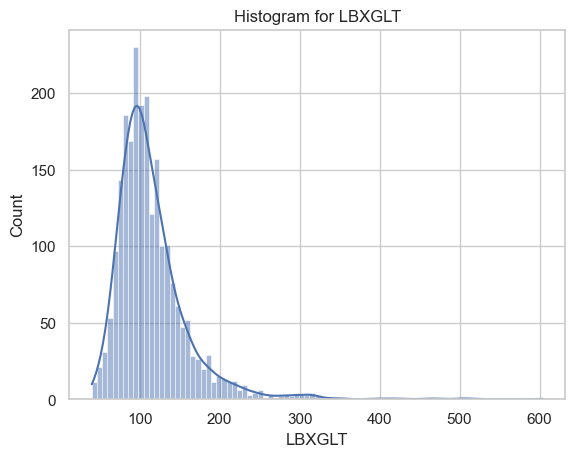

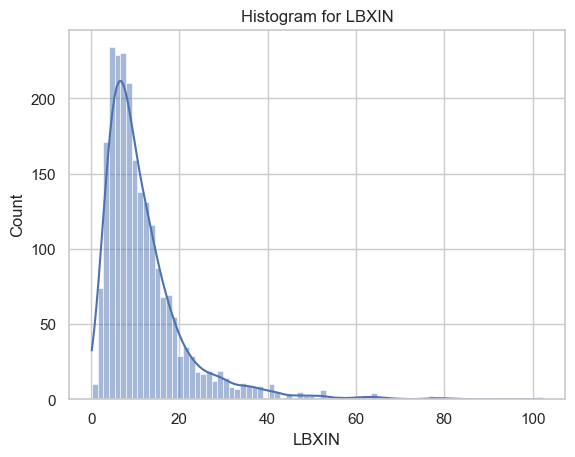

In [68]:
numerical_data = data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png', bbox_inches='tight')

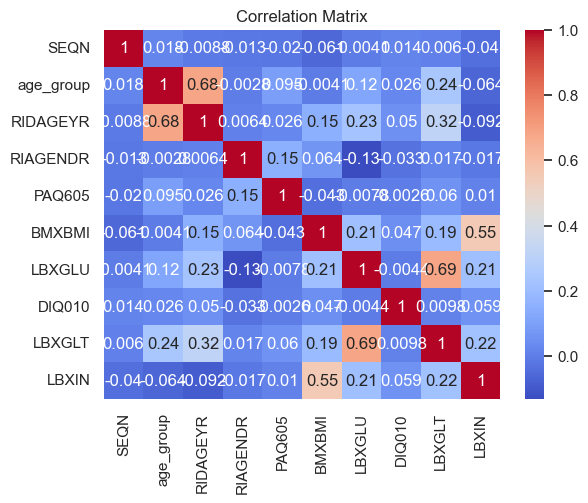

In [69]:
# Выберем интересующие нас столбцы
features_of_interest = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXIN']

# Создание pairplot с разделением по полу (RIAGENDR) или возрастной группе (age_group)
pair_plot = sns.pairplot(data[features_of_interest + ['age_group']], hue='age_group', palette='viridis')

# Для разделения по возрастной группе можно заменить 'RIAGENDR' на 'age_group' в аргументе hue:
# pair_plot = sns.pairplot(data[features_of_interest + ['age_group']], hue='age_group', palette='viridis')

pair_plot.fig.suptitle('Pairplot для ключевых метаболических показателей, разделенных по возрастной группе', y=1.02)
plt.show()

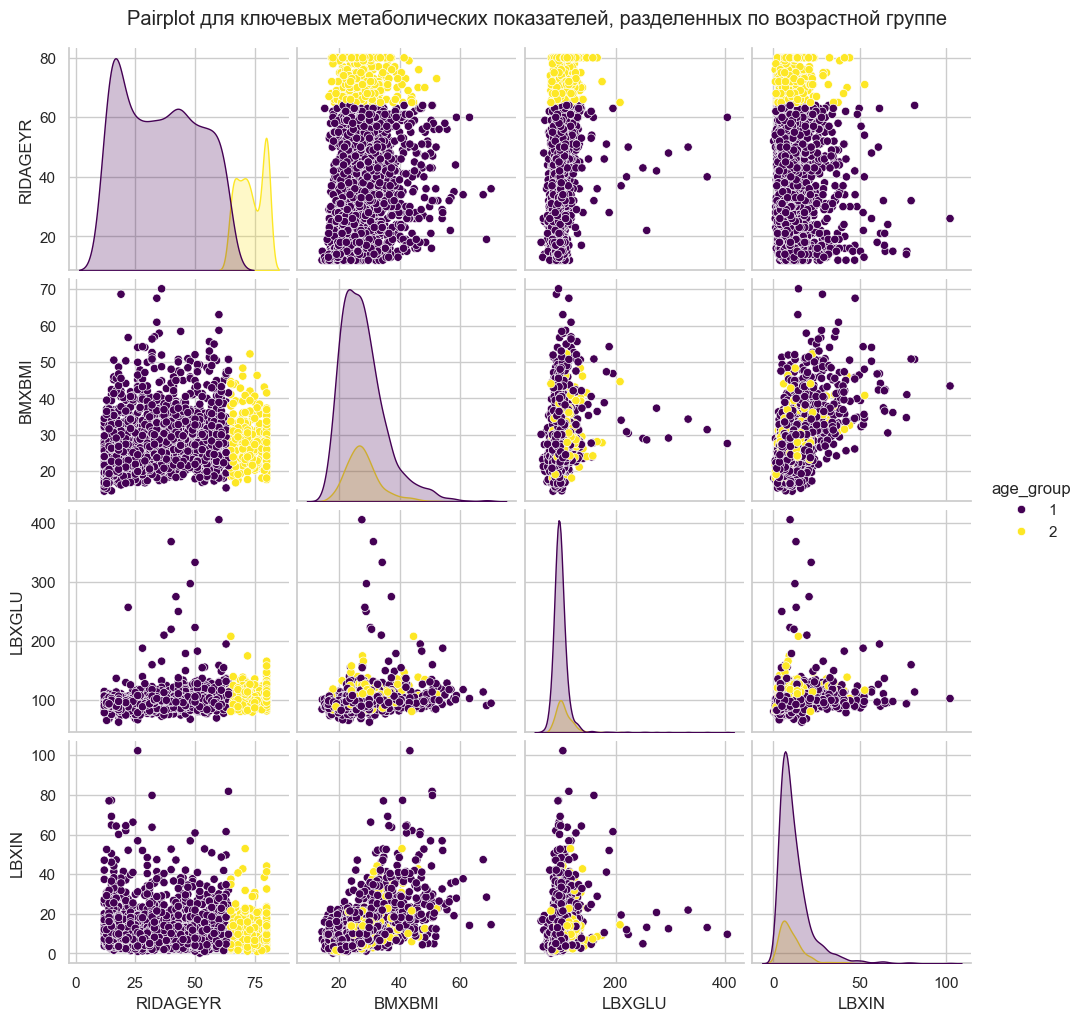

In [70]:
pair_plot.savefig('age_group_pairplot.png', bbox_inches='tight')

In [71]:
plt.figure()
sns.countplot(x='age_group', data=data, palette='Set3', hue='age_group', legend=False)
plt.title('Count Plot for age_group')
plt.xticks(rotation=45)  
plt.savefig('age_group_countplot.png', bbox_inches='tight')

In [15]:
X = data.drop('DIQ010', axis=1)
y = data['DIQ010']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import joblib
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_precision = precision_score(y_test, rf_predictions, average='weighted')

joblib.dump(rf_model, 'rf_model.pkl')

print("RandomForestClassifier:")
print(f'F1 Score: {rf_f1}')
print(f'Accuracy: {rf_accuracy}')
print(f'Recall: {rf_recall}')
print(f'Precision: {rf_precision}')
print()

RandomForestClassifier:
F1 Score: 0.9541866916735046
Accuracy: 0.9692982456140351
Recall: 0.9692982456140351
Precision: 0.9395390889504462



C:\Users\Alex\IdeaProjects\FastApiLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
dummy_model = DummyClassifier(strategy='stratified') 
dummy_model.fit(X_train, y_train)

dummy_predictions = dummy_model.predict(X_test)
joblib.dump(dummy_model, "dummy_model.pkl")

dummy_f1 = f1_score(y_test, dummy_predictions, average='weighted')
dummy_accuracy = accuracy_score(y_test, dummy_predictions)
dummy_recall = recall_score(y_test, dummy_predictions, average='weighted')
dummy_precision = precision_score(y_test, dummy_predictions, average='weighted')

print("DummyClassifier:")
print(f'F1 Score: {dummy_f1}')
print(f'Accuracy: {dummy_accuracy}')
print(f'Recall: {dummy_recall}')
print(f'Precision: {dummy_precision}')
print()

DummyClassifier:
F1 Score: 0.9372113012411823
Accuracy: 0.9320175438596491
Recall: 0.9320175438596491
Precision: 0.9424735202804877



In [19]:
import joblib
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
joblib.dump(svm_model, "svc_model.pkl")
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_precision = precision_score(y_test, svm_predictions, average='weighted')

print("Support Vector Machine:")
print(f'F1 Score: {svm_f1}')
print(f'Accuracy: {svm_accuracy}')
print(f'Recall: {svm_recall}')
print(f'Precision: {svm_precision}')

Support Vector Machine:
F1 Score: 0.9541866916735046
Accuracy: 0.9692982456140351
Recall: 0.9692982456140351
Precision: 0.9395390889504462


C:\Users\Alex\IdeaProjects\FastApiLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
